## Supervised and Unsupervised Learning

We think of a given dataset upon which we are working as a representation of some actual phenomenon. As data scientists, we seek a function, $\widehat{f}$ ("eff hat"), that we can use to approximate this actual phenomenon. We may take different approaches in developing this $\widehat{f}$.

In some cases, we have a set of input data, often called **features**, inputs, or independent variables, and we believe that these features can be uses to predict a **target**, output or dependent variable. If we seek to develop a model that fits a set of features to a target, this is known as **Supervised Learning**. The supervision comes from the fact that the targets or outputs are known. If the target consists of elements coming from a finite set of discrete categories e.g. $\{red, blue, green\}$, $\{heads, tails\}$, then we say that the task is a **classification** task and our $\widehat{f}$ is a classfication model. If the target consists of elements coming from a continuous range of values e.g. *Age* or *SalePrice*, then we say that the task is a **regression** task and our $\widehat{f}$ is a regression model.

**NOTE**: The reasoning behind the name "regression" is historical and is not consistent with the colloquial meaning of the word.

In other cases, we might seek to develop a model from a set of features without any corresponding target data. This type of model development is known as **Unsupervised Learning**. It is unsupervised because the targets are unknown. Common unsupervised learning tasks are **clustering**, in which we attempt to assign our data to a finite number of groups, and **dimensionality reduction**.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

IRIS = load_iris()
iris_df = pd.DataFrame(IRIS.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
labels = IRIS.target_names

In [2]:
feat_names = iris_df.columns

### Regression

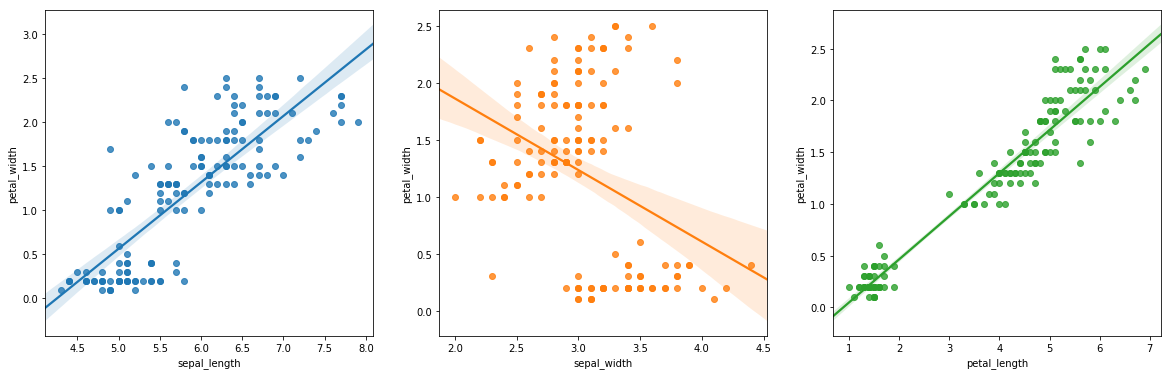

In [3]:
_, ax = plt.subplots(1,3, figsize=(20,6))

for i in range(3):
    sns.regplot(feat_names[i], feat_names[3], 
                data=iris_df, ax=ax[i])

In [4]:
from sklearn.linear_model import LinearRegression
linear_models = [LinearRegression(),
                 LinearRegression(),
                 LinearRegression()]
for feature, model in zip(feat_names[:3], linear_models):
    print("Fitting %s on petal_width with linear regression." % feature)
    features = iris_df[[feature]]
    target = iris_df['petal_width']
    model.fit(features, target)

Fitting sepal_length on petal_width with linear regression.
Fitting sepal_width on petal_width with linear regression.
Fitting petal_length on petal_width with linear regression.


### The Mean Squared Error

One common metric for assessing the performance of a regression model is the expectation of the squared error also known as the **Mean Squared Error**

$$MSE = \mathbb{E}\left[(y-\widehat{y})^2\right] = \frac{1}{n}\sum_{i=1}^n(y_i-\widehat{y}_i)^2$$

In layman's terms this is the average of the squared difference between the actual and the predicted value. Squaring the difference means that

1. The sign of the difference is is irrelevant i.e. overestimating is equivalent to underestimating
2. Larger errors will be more impactful than smaller errors when squared

   e.g. an error of 0.1 becomes 0.01, an error of 10 becomes 100
   

 

In [5]:
def MSE(actual, predicted):
    return sum((actual - predicted)**2)/len(actual)

In [6]:
for feature, model in zip(feat_names[:3], linear_models):
    features = iris_df[[feature]]
    target = iris_df['petal_width']
    print("Scoring linear regression model fit with %s." % feature)
    print("MSE: %f" % MSE(target, model.predict(features)))

Scoring linear regression model fit with sepal_length.
MSE: 0.191466
Scoring linear regression model fit with sepal_width.
MSE: 0.504986
Scoring linear regression model fit with petal_length.
MSE: 0.042290


### Classification

In [7]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

In [8]:
iris_df['target'] = IRIS.target_names[IRIS.target]

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


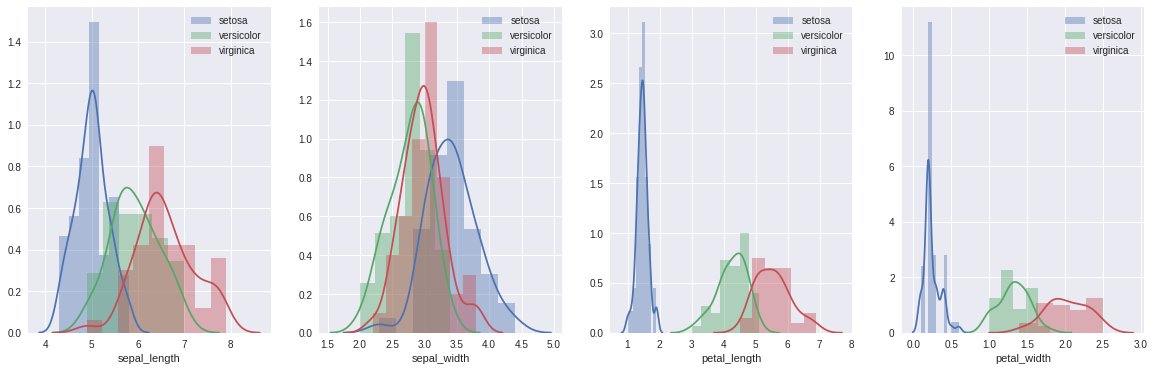

In [9]:
_, ax = plt.subplots(1,4, figsize=(20,6))

for i in range(4):
    for iris_class in iris_df.target.unique():
        plotting_df = iris_df[iris_df.target == iris_class ]
        sns.distplot(plotting_df[feat_names[i]], ax=ax[i], label=iris_class)
        ax[i].legend()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()
features = iris_df.drop('target', axis=1)
target_numerical = LabelEncoder().fit_transform(iris_df['target'])

In [11]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features, target_numerical)

### Display the Classification Predictions and Actual

In [12]:
tree.fit(features_train, target_train)
target_prediction = tree.predict(features_validation)
target_prediction

array([1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0])

In [13]:
target_validation

array([1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0])

In [14]:
difference = np.abs(target_validation - target_prediction)
difference

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled_validation = StandardScaler().fit_transform(features_validation)
iris_2d_validation = pca.fit_transform(features_scaled_validation)

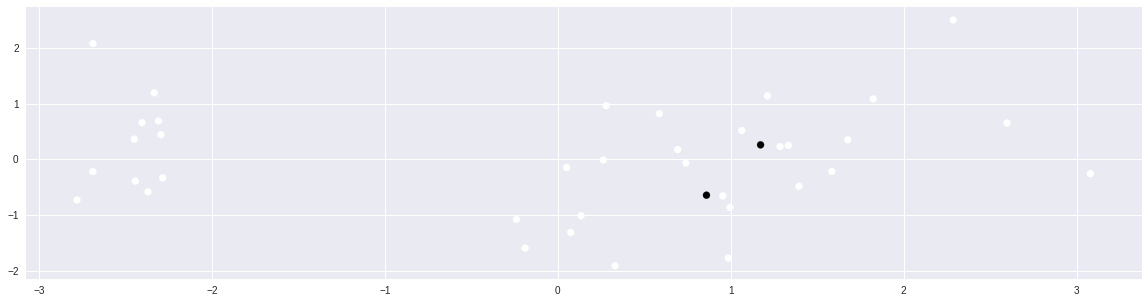

In [16]:
plt.figure(figsize=(20,5))
plt.scatter(x=iris_2d_validation[:,0], y=iris_2d_validation[:,1], c=difference)


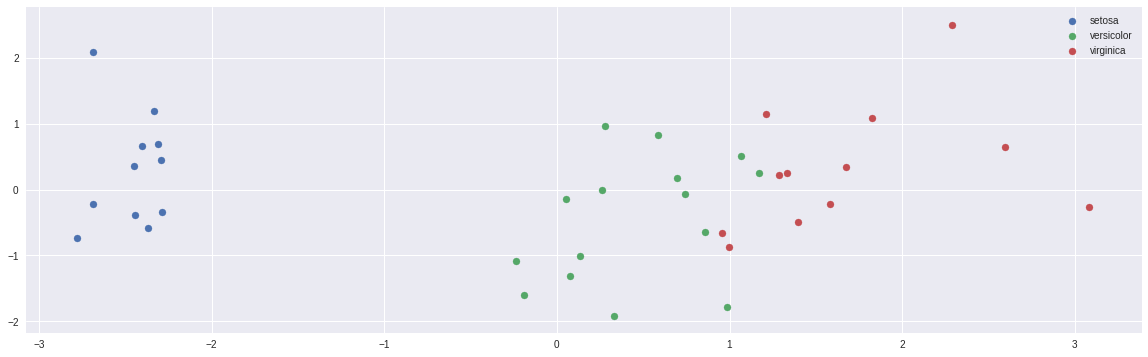

In [17]:
for i, label in enumerate(labels):
    group_mask = target_validation == i
    group = iris_2d_validation[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()

### Measure the Accuracy

In [18]:
def accuracy(actual, predicted):
    return 1 - sum(np.abs(actual - predicted))/len(actual)

In [19]:
accuracy(target_validation, target_prediction)

0.94736842105263164

### Clustering

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)


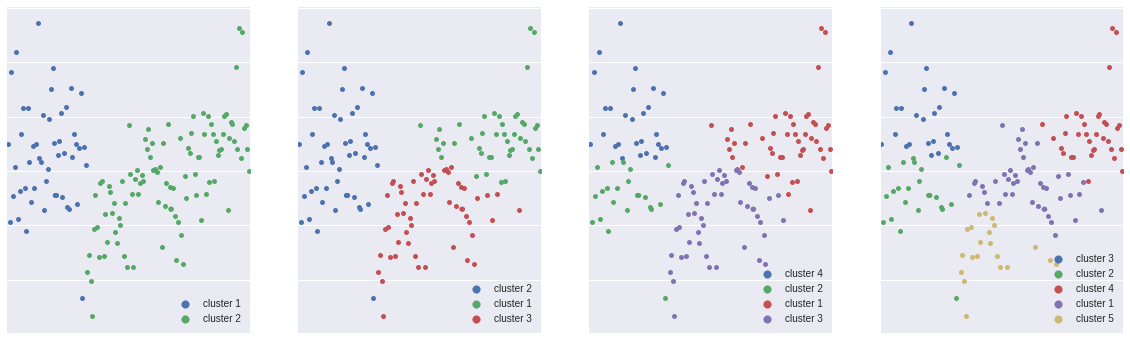

In [22]:
from sklearn.cluster import KMeans

number_of_clusters = [2,3,4,5]

_, ax = plt.subplots(1,4, figsize=(20,6))

features_scaled = StandardScaler().fit_transform(IRIS.data)
iris_2d = pca.fit_transform(features_scaled)
named_target = np.array([labels[n] for n in IRIS.target])

for i, clusters in enumerate(number_of_clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(features_scaled)
    cluster_labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    sns.swarmplot(x=iris_2d[:,0], y=iris_2d[:,1], hue=cluster_labels, ax=ax[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].legend(loc='lower right')

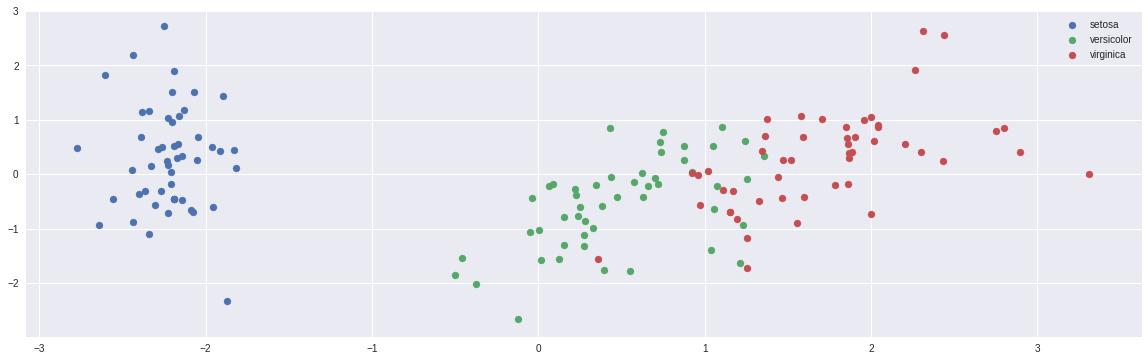

In [23]:
for label in labels:
    group_mask = named_target == label
    group = iris_2d[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()